<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 18: Models

Associated Textbook Sections: [10.4, 11.0, 11.1](ccsf-math-108.github.io/textbook/chapters/10/4/Random_Sampling_in_Python.html)

---

## Outline

* [Assessing Models](#Assessing-Models)
* [Jury-Selection](#Jury-Selection)
* [A Genetic Model](#A-Genetic-Model)
* [Two Viewpoints](#Two-Viewpoints)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Assessing Models

---

### Models

* A model is a set of assumptions about the data
* In data science, many models involve assumptions about processes that involve randomness ("Chance models")
* Key question: Does the model fit the data?

---

### Approach to Assessment

* If we can simulate data according to the assumptions of the model, we can learn what the model predicts.
* We can then compare the predictions to the data that were observed.
* If the data and the model's predictions are not consistent, that is evidence against the model.

---

## Jury Selection

---

### Swain vs. Alabama, 1965

* Talladega County, Alabama
* Robert Swain, Black man convicted of crime
* Appeal: one factor was all-White jury
* Only men 21 years or older were allowed to serve
* 26% of this population were Black
* Swain's jury panel consisted of 100 men
* 8 men on the panel were Black

---

### Supreme Court Ruling (In English ... of the time)

* About disparities between the percentages in the eligible population and the jury panel, the Supreme Court wrote:
> "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes"
* The Supreme Court denied Robert Swain’s appeal


---

### Supreme Court Ruling (in Data)

* Paraphrase: 8/100 is less than 26%, but not different enough to show Black men were systematically excluded
* Question: is 8/100 a realistic outcome if the jury panel selection process were truly unbiased?

---

### Sampling from a Distribution

* Sample at random from a categorical distribution using `sample_proportions(sample_size, pop_distribution)`
* Samples at random from the population returns an array containing the distribution of the categories in the sample


---

### Demo: Swain vs. Alabama

* Create a 2-valued array that reflects the proportion of the population that is Black and not Black.
* Use `sample_proportions` to create the proportions of a sample of size 100 from the population defined by the above array values.
* Define a function to return the proportion of Black individuals in a random sample of size 100 from the given population.
* Visualize the distribution by calling that function 10,000 times.

In [ ]:
population_proportions = make_array(0.26,0.74)
population_proportions

array([ 0.26,  0.74])

In [ ]:
help(sample_proportions)

Help on function sample_proportions in module datascience.util:

sample_proportions(sample_size, probabilities)
    Return the proportion of random draws for each outcome in a distribution.
    
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
    
        ``probabilities``: An array of probabilities that forms a distribution.
    
    Returns:
        An array with the same length as ``probability`` that sums to 1.



In [ ]:
sample_proportions(100, population_proportions)

array([ 0.18,  0.82])

In [ ]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [ ]:
panel_proportion()

0.3

In [ ]:
panels = make_array()

for _ in np.arange(10_000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

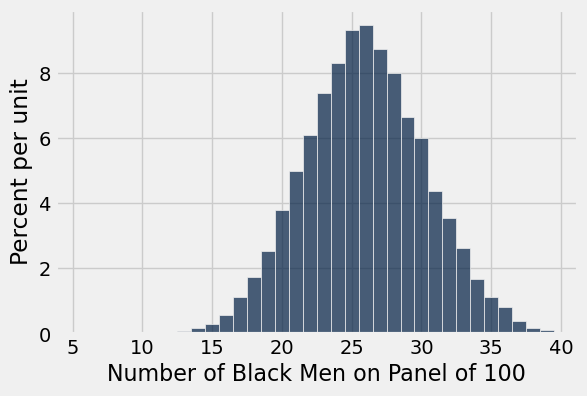

In [ ]:
(Table().with_column('Number of Black Men on Panel of 100', panels)
        .hist(bins=np.arange(5.5,40.)))

---

## A Genetic Model

---

### Gregor Mendel, 1822-1884

<a href="https://en.wikipedia.org/wiki/Gregor_Mendel" title="Wikipedia - Gregor Mendel"><img src="./Gregor_Mendel.jpeg" alt="Gregor Mendel"
width = 30%></a>

---

### A Model

* Pea plants of a particular kind
* Each one has either purple flowers or white flowers
* Mendel’s model: Each plant is purple-flowering with chance 75%, regardless of the colors of the other plants
* Question: Is the model good, or not?


---

### Choosing a Statistic

* Take a sample, see what percent are purple-flowering
* If that percent is much larger or much smaller than 75, that is evidence against the model
* Distance from 75 is the key
* Statistic: `abs(sample_percent_of_purple_flowering_plants - 75)`
* If the statistic is large, that is evidence against the model


---

### Demo: Mendel and Pea Flowers

Mendel had 929 plants, of which 709 had purple flowers:

* Define the observed proportion of purple flowers in Mendel's data and the predicted population proportions for purple and non-purple flowers.
* Simulate sampling 929 plants from a population with the proportions predicted by Mendel.
* Simulate randomly selecting samples of 929 plants based on Mendel's model.
* Repeat this process 10000 times and visualize the distribution of the sample proportions.
* Visualize the distribution of the test statistics created from the simulations and identify where the observed statistic fits in the distribution.

In [ ]:
observed_purples = 709/929
observed_purples

0.7631862217438106

In [ ]:
predicted_proportions = make_array(0.75,0.25)
predicted_proportions

array([ 0.75,  0.25])

In [ ]:
sample_proportions(929,predicted_proportions)

array([ 0.76426265,  0.23573735])

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

76.64155005382132

In [ ]:
purples = make_array()

for _ in np.arange(10_000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

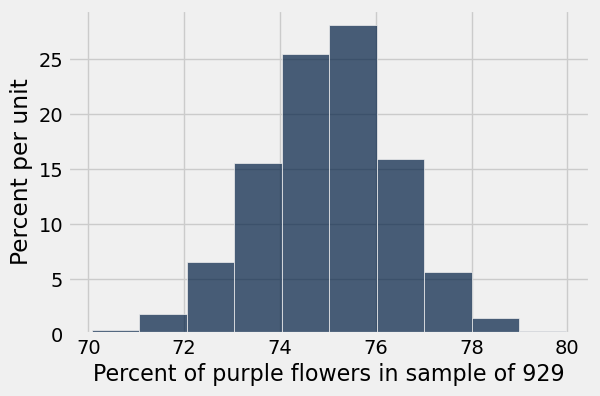

In [ ]:
(Table().with_column('Percent of purple flowers in sample of 929', purples)
        .hist())

In [ ]:
test_statistics = Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75))
test_statistics

Discrepancy in sample of 929 if the model is true
0.565124
0.134553
1.15716
2.12594
0.83423
0.457481
2.07212
1.58773
0.941873
0.242196


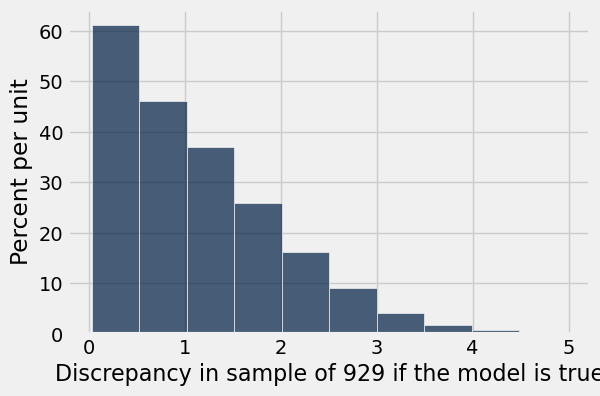

In [ ]:
test_statistics.hist()

In [ ]:
test_statistics1 = Table().with_column('Discrepancy in sample of 929 if the model is true', purples- 75)
test_statistics1

Discrepancy in sample of 929 if the model is true
0.565124
0.134553
-1.15716
-2.12594
-0.83423
0.457481
2.07212
-1.58773
-0.941873
0.242196


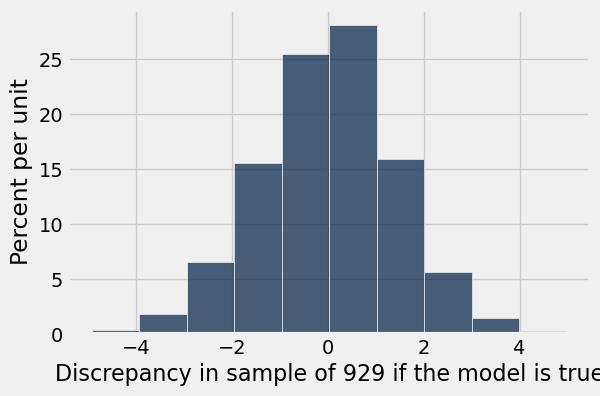

In [ ]:
test_statistics1.hist()

In [ ]:
observed_statistic = abs(observed_purples * 100 - 75)
observed_statistic

1.318622174381062

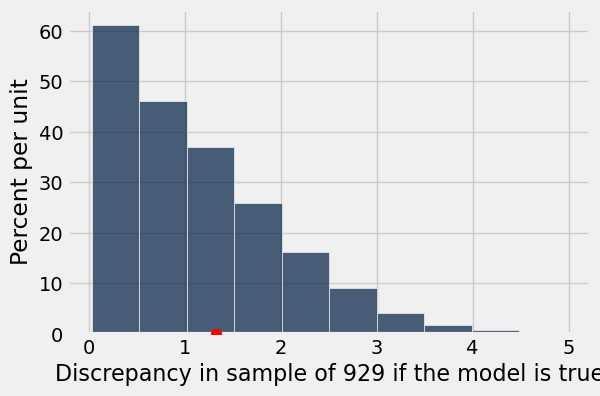

In [ ]:
test_statistics.hist()
plt.scatter(observed_statistic, 0, color='red', s=60, zorder=3)
plt.show()

---

## Two Viewpoints

---

### Model and Alternative

* Jury selection:
    * Model: The people on the jury panels were selected at random from the eligible population
    * Alternative viewpoint: No, they weren't
* Genetics:
    * Model: Each plant has a 75% chance of having purple flowers
    * Alternative viewpoint: No, it doesn't

---

### Steps in Assessing a Model

* Choose a statistic to measure discrepancy between model and data
* Simulate the statistic under the model’s assumptions
* Compare the data to the model’s predictions:
    * Draw a histogram of simulated values of the statistic
    * Compute the observed statistic from the real sample
    * If the observed statistic is far from the histogram, that is evidence against the model


---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>